In [1]:
#importacoes para este projeto
#caso va usar em power BI, cada bloco deve ir com as importacoes

import pandas  as pd
import seaborn as sns
import numpy   as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.utils import resample

#versoes do python e das bibliotecas usadas
from platform import python_version
print('sua versao python:', python_version())

!pip install -q -U watermark
%reload_ext watermark
%watermark -a 'Bazzo Data Analyst' --iversions

sua versao python: 3.9.7
Author: Bazzo Data Analyst

pandas    : 1.3.4
matplotlib: 3.4.3
seaborn   : 0.11.2
numpy     : 1.20.3



### Carregando dados teste e gráfico violinplot teste

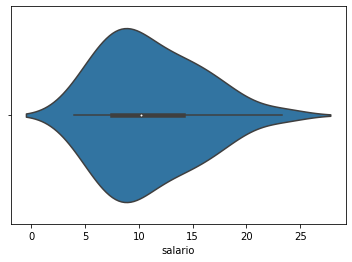

In [2]:
#carregando dados e fazendo violin plot, teste 1
dataset = pd.read_csv('Usuarios.csv')
sns.violinplot(x = 'salario', data = dataset)
plt.show()

### Carregando dados para análise

In [3]:
dadosRH = pd.read_csv('dadosRH.csv')
dadosRH.head()


,id_funcionario,departmento,regiao,educacao,genero,canal_recrutamento,numero_treinamentos,idade,aval_ano_anterior,tempo_servico,promovido
0,65438,Marketing,Sudeste,Mestrado ou Doutorado,F,Outsourcing,1,35,5.0,8,0
1,65141,Logistica,Nordeste,Superior,M,Outro,1,30,5.0,4,0
2,7513,Marketing,Sudeste,Superior,M,Outsourcing,1,34,3.0,7,0
3,2542,Marketing,Norte,Superior,M,Outro,2,39,1.0,10,0
4,48945,Tecnologia,Nordeste,Superior,M,Outro,1,45,3.0,2,0


In [4]:
dadosRH.shape

(54808, 11)

### analise exploratoria dos dados

In [5]:
#vendo se ha valores ausentes
dadosRH.isnull().sum()

id_funcionario            0
departmento               0
regiao                    0
educacao               2409
genero                    0
canal_recrutamento        0
numero_treinamentos       0
idade                     0
aval_ano_anterior      4124
tempo_servico             0
promovido                 0
dtype: int64

In [6]:
#agrupar por educacao e contar. #### o groupby nao considera os valores ausentes
dadosRH.groupby(['educacao']).count()

,id_funcionario,departmento,regiao,genero,canal_recrutamento,numero_treinamentos,idade,aval_ano_anterior,tempo_servico,promovido
educacao,,,,,,,,,,
Ensino Medio,805,805,805,805,805,805,805,458,805,805
Mestrado ou Doutorado,14925,14925,14925,14925,14925,14925,14925,14798,14925,14925
Superior,36669,36669,36669,36669,36669,36669,36669,33404,36669,36669


<AxesSubplot:xlabel='educacao', ylabel='count'>

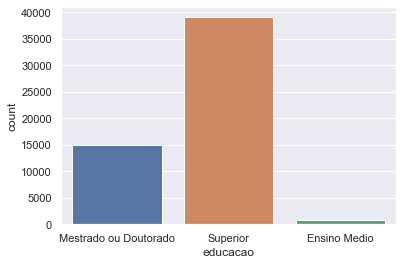

In [54]:
#mostrar um grafico rapido dos dados acima
sns.countplot(dadosRH['educacao'])

<AxesSubplot:xlabel='aval_ano_anterior', ylabel='count'>

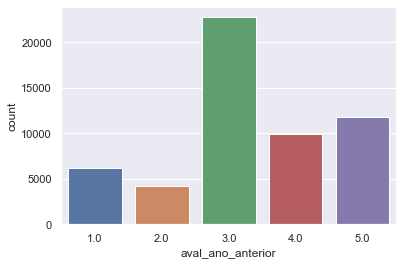

In [52]:
# o mesmo de cima mas mudando a coluna, no caso, essa coluna de aval_ano_anterior
# tem valores ausentes assim como educacao
dadosRH.groupby(['aval_ano_anterior']).count()
sns.countplot(dadosRH['aval_ano_anterior'])

### preencher valores ausentes

In [9]:
#preenchendo com moda e mediana
#o indice '0'significa que voce vai retornar o maior valor
#inplace significa que sera inserida na tabela substituindo os valores

dadosRH['educacao'].fillna(dadosRH['educacao'].mode()[0], inplace = True)
dadosRH['aval_ano_anterior'].fillna(dadosRH['aval_ano_anterior'].median(), inplace = True)

In [10]:
#verificando se ha algum valor nulo ainda
dadosRH.isnull().sum()


id_funcionario         0
departmento            0
regiao                 0
educacao               0
genero                 0
canal_recrutamento     0
numero_treinamentos    0
idade                  0
aval_ano_anterior      0
tempo_servico          0
promovido              0
dtype: int64

In [11]:
dadosRH.shape

(54808, 11)

In [12]:
#reexibindo as tabelas com os valores ajustados
dadosRH.groupby(['educacao']).count()


,id_funcionario,departmento,regiao,genero,canal_recrutamento,numero_treinamentos,idade,aval_ano_anterior,tempo_servico,promovido
educacao,,,,,,,,,,
Ensino Medio,805,805,805,805,805,805,805,805,805,805
Mestrado ou Doutorado,14925,14925,14925,14925,14925,14925,14925,14925,14925,14925
Superior,39078,39078,39078,39078,39078,39078,39078,39078,39078,39078


In [13]:
dadosRH.groupby(['aval_ano_anterior']).count()

,id_funcionario,departmento,regiao,educacao,genero,canal_recrutamento,numero_treinamentos,idade,tempo_servico,promovido
aval_ano_anterior,,,,,,,,,,
1.0,6223,6223,6223,6223,6223,6223,6223,6223,6223,6223
2.0,4225,4225,4225,4225,4225,4225,4225,4225,4225,4225
3.0,22742,22742,22742,22742,22742,22742,22742,22742,22742,22742
4.0,9877,9877,9877,9877,9877,9877,9877,9877,9877,9877
5.0,11741,11741,11741,11741,11741,11741,11741,11741,11741,11741


### balanceamento de classes

In [14]:
#o balanceamento de classe é ideal para machine learning, neste caso, usar uma tecnica estatistica
# para criar valores sinteticos e balancear a classe

dadosRH.groupby(['promovido']).count()

,id_funcionario,departmento,regiao,educacao,genero,canal_recrutamento,numero_treinamentos,idade,aval_ano_anterior,tempo_servico
promovido,,,,,,,,,,
0,50140,50140,50140,50140,50140,50140,50140,50140,50140,50140
1,4668,4668,4668,4668,4668,4668,4668,4668,4668,4668


<AxesSubplot:xlabel='promovido', ylabel='count'>

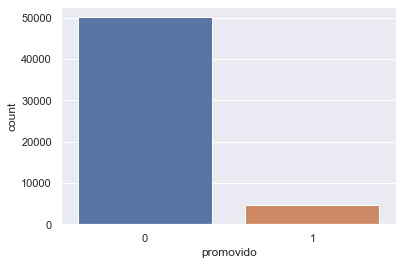

In [50]:
#verificando no grafico e na tabela acima, verifica-se que esta desbalanceado, ou seja, tem muito mais numeros
# 0 do que numeros 1, o que faz sentido, pois 0 significa que nao foi promovido e 1 promovido.
sns.countplot(dadosRH['promovido'])

In [16]:
#definindo classes minoritaria e majoritaria
df_classe_majoritaria = dadosRH[dadosRH.promovido==0]
df_classe_minoritaria = dadosRH[dadosRH.promovido==1]

In [17]:
df_classe_majoritaria.shape


(50140, 11)

In [18]:
df_classe_minoritaria.shape

(4668, 11)

In [19]:
#usar UPSAMPLE para adicionar valores sinteticos na classe minoritaria
#tecnica de reamostragem

#nsamples é o numero de amostras
# rando state sao os valores random a serem criados
from sklearn.utils import resample
df_classe_minoritaria_upsampled = resample(df_classe_minoritaria,
                                          replace      = True,
                                          n_samples    = 50140,
                                          random_state = 150)


In [20]:
#concatenar os dados balanceados com a tabela
dadosRH_balanceados = pd.concat([df_classe_majoritaria, df_classe_minoritaria_upsampled])

In [21]:
#contar numero dos dados balanceados
dadosRH_balanceados.promovido.value_counts()

0    50140
1    50140
Name: promovido, dtype: int64

In [22]:
dadosRH_balanceados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100280 entries, 0 to 5869
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id_funcionario       100280 non-null  int64  
 1   departmento          100280 non-null  object 
 2   regiao               100280 non-null  object 
 3   educacao             100280 non-null  object 
 4   genero               100280 non-null  object 
 5   canal_recrutamento   100280 non-null  object 
 6   numero_treinamentos  100280 non-null  int64  
 7   idade                100280 non-null  int64  
 8   aval_ano_anterior    100280 non-null  float64
 9   tempo_servico        100280 non-null  int64  
 10  promovido            100280 non-null  int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 9.2+ MB


<AxesSubplot:xlabel='promovido', ylabel='count'>

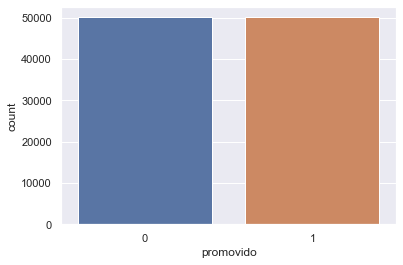

In [47]:
#grafico dos dados balanceados
sns.countplot(dadosRH_balanceados['promovido'])

### salvar dados em disco para começar a manipulacao de dados

In [24]:
#index deve ser falso para nao levar o indice, pois o pandas cria o indice por ser um DATAFRAME
dadosRH_balanceados.to_csv('dadosRH_modificado.csv', encoding ='utf-8', index = False)

### carregando dados novos

In [25]:
dataset = pd.read_csv('dadosRH_modificado.csv')
dataset.head()

,id_funcionario,departmento,regiao,educacao,genero,canal_recrutamento,numero_treinamentos,idade,aval_ano_anterior,tempo_servico,promovido
0,65438,Marketing,Sudeste,Mestrado ou Doutorado,F,Outsourcing,1,35,5.0,8,0
1,65141,Logistica,Nordeste,Superior,M,Outro,1,30,5.0,4,0
2,7513,Marketing,Sudeste,Superior,M,Outsourcing,1,34,3.0,7,0
3,2542,Marketing,Norte,Superior,M,Outro,2,39,1.0,10,0
4,48945,Tecnologia,Nordeste,Superior,M,Outro,1,45,3.0,2,0


### Análises

### Correlação entre atributos dos funcionários

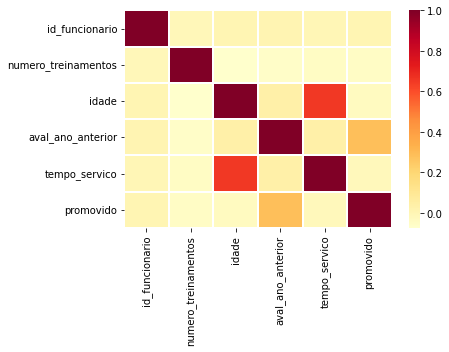

In [26]:
# quanto maior a idade por exemplo, maior o tempo de serviço, isso significa que existe uma
# correlacao positiva entre tempo_servico e idade

import matplotlib.pyplot as plt
import seaborn as sns
corr = dataset.corr()
sns.heatmap(corr, cmap = "YlOrRd", linewidth = 0.1)
plt.show()

### Tempo de serviço da maioria dos funcionários

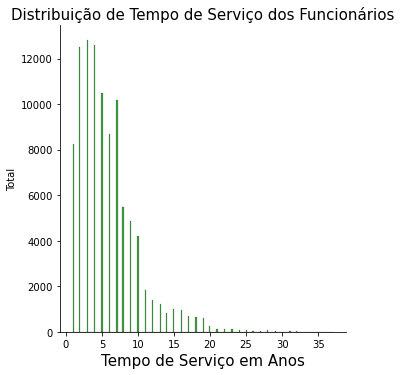

In [31]:
#neste caso, segundo a analise, podemos concluir que a maioria dos funcionarios ficam na empresa
# entre 3 e 5 anos, e depois cai de maneira drastica a quantidade de anos

import matplotlib.pyplot as plt
import seaborn as sns
sns.displot(dataset['tempo_servico'], color = 'green')
plt.title  ('Distribuição de Tempo de Serviço dos Funcionários', fontsize = 15)
plt.xlabel ('Tempo de Serviço em Anos', fontsize = 15)
plt.ylabel ('Total')
plt.show()

### Avaliação do ano Anterior

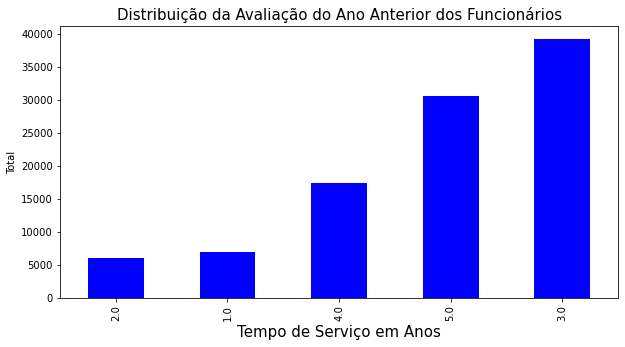

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

#contar valores, ordenar, inserir plot bar, escolher a cor e o tamanho da figura
dataset['aval_ano_anterior'].value_counts().sort_values().plot.bar(color = 'blue',figsize = (10,5))
plt.title  ('Distribuição da Avaliação do Ano Anterior dos Funcionários', fontsize = 15)
plt.xlabel ('Tempo de Serviço em Anos', fontsize = 15)
plt.ylabel ('Total')
plt.show()

### Distribuição da Idade dos Funcionários

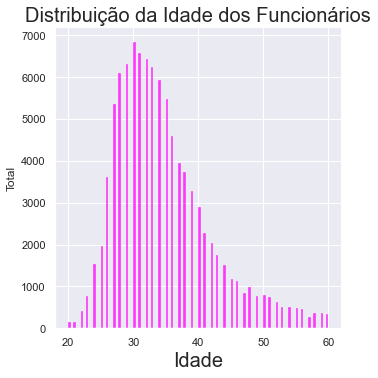

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.displot(dataset['idade'], color = 'magenta')
plt.title('Distribuição da Idade dos Funcionários', fontsize = 20)
plt.xlabel('Idade', fontsize = 20)
plt.ylabel('Total')
plt.show()

### Frequencia de cursos de funcionários

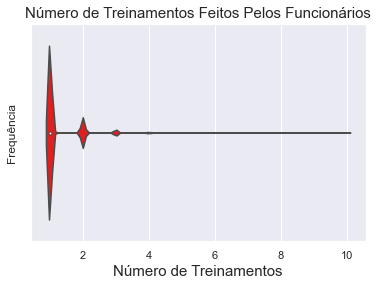

In [60]:
#esta analise significa qual o numero de cursos mais frequentes pelos funcionarios, 
# sendo 1 curso ate no max 4 cursos

import matplotlib.pyplot as plt
import seaborn as sns
sns.violinplot(dataset['numero_treinamentos'], color = 'red')
plt.title('Número de Treinamentos Feitos Pelos Funcionários', fontsize = 15)
plt.xlabel('Número de Treinamentos', fontsize = 15)
plt.ylabel('Frequência')
plt.show()

### Proporção dos Funcionários Por Canal de Recrutamento

In [61]:
dataset['canal_recrutamento'].value_counts()

Outro          55375
Outsourcing    42358
Indicado        2547
Name: canal_recrutamento, dtype: int64

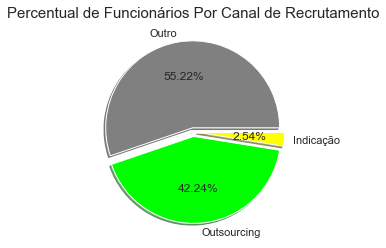

In [67]:
#GRAFICO DOS DADOS ACIMA

import matplotlib.pyplot as plt
import seaborn as sns
dataset['canal_recrutamento'].value_counts()
fatias = [55375, 42358, 2547]
labels = "Outro", "Outsourcing", "Indicação"
colors = ['gray', 'lime', 'yellow']
explode = [0.05, 0.05, 0.05]
plt.pie(fatias, labels = labels, colors = colors, explode = explode, shadow = True, autopct = "%.2f%%")
plt.title('Percentual de Funcionários Por Canal de Recrutamento', fontsize = 15)
plt.axis('off')
#plt.legend()
plt.show()

### Relação Entre a Promoção e a Avaliação do Ano Anterior

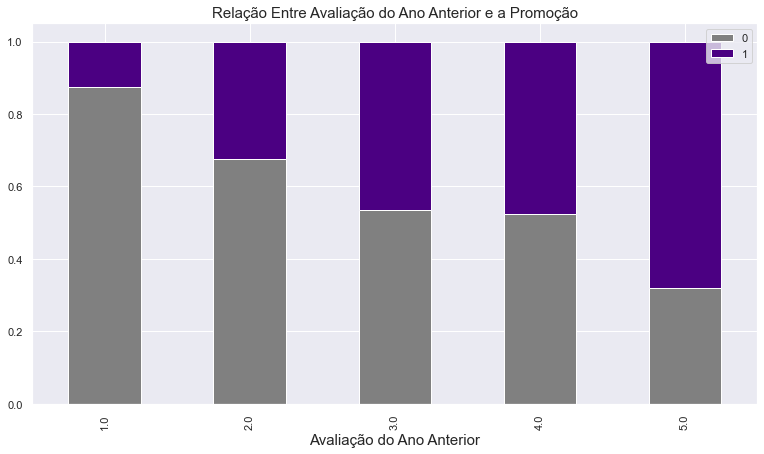

In [76]:
# numero '1'  significa que foi promovido, numero '0' significa que ele nao foi promovido

import matplotlib.pyplot as plt
import seaborn as sns
data = pd.crosstab(dataset['aval_ano_anterior'], dataset['promovido'])
data.div(data.sum(1).astype(float), axis = 0).plot(kind = 'bar', 
                                                   stacked = True, 
                                                   figsize = (13, 7), 
                                                   color = ['gray', 'indigo'])
plt.title('Relação Entre Avaliação do Ano Anterior e a Promoção', fontsize = 15)
plt.xlabel('Avaliação do Ano Anterior', fontsize = 15)
plt.legend()
plt.show()